In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
import seaborn as sns
import scipy.stats as st
from tqdm import tqdm
from matplotlib.animation import FuncAnimation 
from IPython.display import HTML
import math
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import psutil
from numba import njit
from concurrent.futures import ProcessPoolExecutor
import json
import pickle
from PIL import Image
import os

from main import run_model
from plots import imshow3d

In [30]:
L = 100
v = 1
angle = 0
Ni = 2
size = 0.5

N0 = 4
K = 50
eps = 0.5
r = 0.02
dt = 0.5
dispersal = 50
food_energy = 500

sight_radius = 4
alpha = 1
max_energy = 10000
nsteps = 20000
plot_frequency = 1e9
mutatables = ['velocity', 'sight_radius', 'alpha']
# mutatables = [None]

fig_rows = 1
fig_columns = 2
figsize = (8,4)

In [31]:
positions, velocities, energy, life, size_vec, sight_vec, food_pos, alphas = run_model(
    Ni,
    N0,
    L,
    v,
    food_energy,
    angle,
    size,
    K,
    r,
    dt,
    sight_radius,
    alpha,
    max_energy,
    dispersal,
    nsteps,
    plot_frequency,
    fig_rows = fig_rows,
    fig_columns = fig_columns,
    figsize = figsize,
    mutatables = mutatables,
    print_memory = True
)

In [32]:
food_population = []

for i in range(nsteps):
    food_population.append(len(food_pos[i]))
    
population = []
velocity = []
sight = []
alpha_values = []

for i in range(nsteps):
    alive = np.where(life[i] == 1)[0]
    population.append(len(alive))
    velocity.append(np.mean(velocities[i][alive]))
    sight.append(np.mean(sight_vec[i][alive]))
    alpha_values.append(np.mean(alphas[i][alive]))

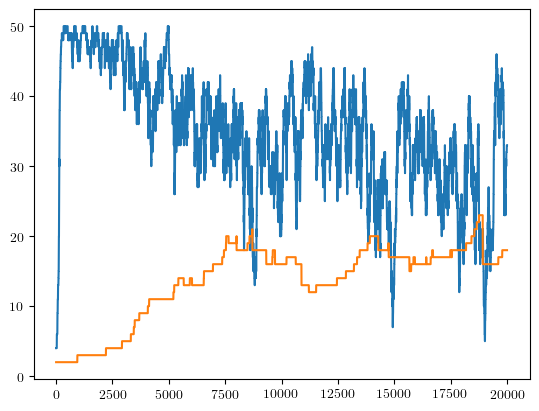

In [33]:
plt.plot(food_population)
plt.plot(population)
plt.show()

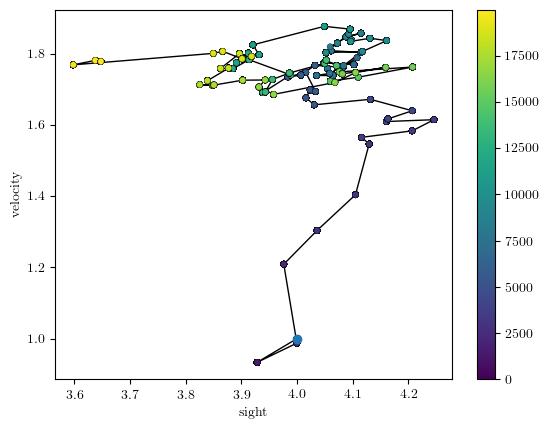

In [34]:
plt.plot(sight, velocity, c = 'black', lw = 1, zorder = 0)
plt.scatter(sight, velocity, marker = 'o', s = 20, c = [i for i in range(nsteps)], edgecolor = 'black',
           lw = 0.2)
plt.colorbar()
plt.xlabel('sight')
plt.ylabel('velocity')
plt.scatter(sight_radius, v)
plt.show()

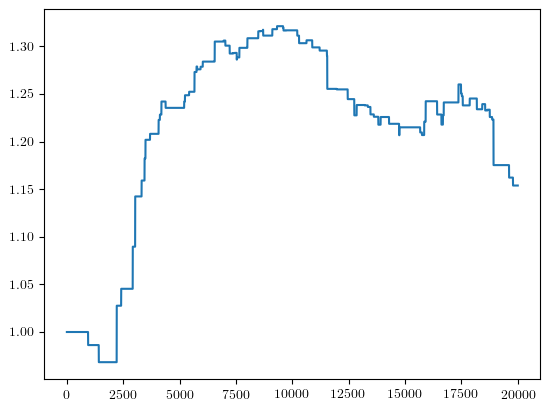

In [35]:
plt.plot(alpha_values)
plt.show()

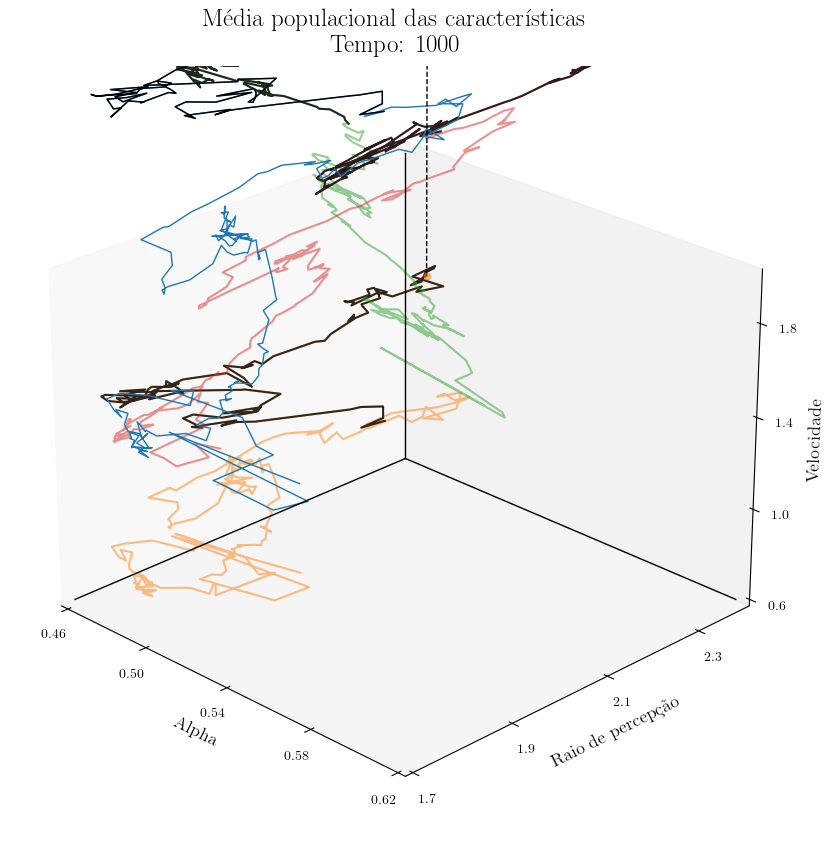

In [7]:
zenith = 25
theta = 315
idx = 1000
attenzione = 600
pickpocket = 1000

xmin, xmax = 0.46, 0.62
ymin, ymax = 1.7, 2.4
zmin, zmax = 0.6, 2
labelsize = 13

ax = plt.figure(figsize=(8,8)).add_subplot(projection='3d')

ax.grid(False)

ax.plot(alpha_values[:idx], sight[:idx], velocity[:idx], lw=1)
ax.plot(alpha_values[attenzione:pickpocket], sight[attenzione:pickpocket], velocity[attenzione:pickpocket], lw=1, color = 'black')
ax.scatter(alpha_values[pickpocket-1], sight[pickpocket-1], velocity[pickpocket-1], color = 'black')

# imshow3d(ax, data[0], value_direction='x', cmap='magma')

ax.set_zlim(zmin, zmax)
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)

ax.set_xticks([0.46,0.50,0.54,0.58,0.62])
ax.set_xlabel("Alpha", fontsize = labelsize)
ax.set_yticks([1.7,1.9,2.1,2.3])
ax.set_ylabel("Raio de percepção", fontsize = labelsize)
ax.set_zticks([0.6,1,1.4,1.8])
ax.set_zlabel("Velocidade", fontsize = labelsize)

    
ax.plot([alpha_values[pickpocket-1], alpha_values[pickpocket-1]], [sight[pickpocket-1],sight[pickpocket-1]], [zmin, velocity[pickpocket-1]],
       color = 'black', lw = 1, ls = '--')
ax.plot([alpha_values[pickpocket-1], alpha_values[pickpocket-1]], [ymax,sight[pickpocket-1]], [velocity[pickpocket-1], velocity[pickpocket-1]],
       color = 'black', lw = 1, ls = '--')
ax.plot([xmin, alpha_values[pickpocket-1]], [sight[pickpocket-1],sight[pickpocket-1]], [velocity[pickpocket-1], velocity[pickpocket-1]],
       color = 'black', lw = 1, ls = '--')

ax.plot(alpha_values[:idx], sight[:idx], zs=zmin, zdir='z', zorder = 0, alpha = 0.5, color = 'C1') # xy plane
ax.plot(alpha_values[attenzione:pickpocket], sight[attenzione:pickpocket], zs=zmin, zdir='z', zorder = 0, alpha = 0.8, color = 'black') # xy plane
ax.scatter(alpha_values[idx-1], sight[idx-1], zs=zmin, zdir='z', zorder = 0, alpha = 0.5, color = 'C1') # xy plane
ax.plot(alpha_values[:idx], velocity[:idx], zs=ymax, zdir='y', zorder = 0, alpha = 0.5, color = 'C2') # xz plane
ax.plot(alpha_values[attenzione:pickpocket], velocity[attenzione:pickpocket], zs=ymax, zdir='y', zorder = 0, alpha = 0.8, color = 'black') # xz plane
ax.scatter(alpha_values[idx-1], velocity[idx-1], zs=ymax, zdir='y', zorder = 0, alpha = 0.5, color = 'C2') # xz plane
ax.plot(sight[:idx], velocity[:idx], zs=xmin, zdir='x', zorder = 0, alpha = 0.5, color = 'C3') # yz plane
ax.plot(sight[attenzione:pickpocket], velocity[attenzione:pickpocket], zs=xmin, zdir='x', zorder = 0, alpha = 0.8, color = 'black') # yz plane
ax.scatter(sight[idx-1], velocity[idx-1], zs=xmin, zdir='x', zorder = 0, alpha = 0.5, color = 'C3') # yz plane

ax.plot([xmin,xmin], [ymax,ymax], [zmin, zmax], lw = 1, color = 'black') # z axis
ax.plot([xmin,xmin], [ymin,ymax], [zmin, zmin], lw = 1, color = 'black') # y axis
ax.plot([xmin,xmax], [ymax,ymax], [zmin, zmin], lw = 1, color = 'black') # x axis

plt.tight_layout()

ax.set_title("Média populacional das características" "\n" f"Tempo: {idx}", fontsize = 18, pad = 10)
ax.view_init(zenith, theta)
# plt.savefig(f"Plots/Mean_trajectory_characteristicis_I{attenzione}-F{pickpocket}_dispersalLOW.png", dpi = 90, bbox_inches = 'tight')
plt.show()

In [178]:
zenith = 25
# theta = 315

xmin, xmax = 0.46, 0.62
ymin, ymax = 1.7, 2.4
zmin, zmax = 0.6, 2
labelsize = 13

ax = plt.figure(figsize=(8,8)).add_subplot(projection='3d')
for frame in tqdm(range(200+180)):
    if frame < 200:
        theta = 315
        idx = max(int(5*frame),1)
    elif 200 <= frame < 380:
        theta = (315 + 2*(frame-200))%360
        idx = 1000
    else:
        theta = 315
        idx = 1000
    
    ax.clear()
    ax.grid(False)

    ax.plot(alpha_values[:idx], sight[:idx], velocity[:idx], lw=1)
    ax.scatter(alpha_values[idx-1], sight[idx-1], velocity[idx-1], color = 'black')

    # imshow3d(ax, data[0], value_direction='x', cmap='magma')

    ax.set_zlim(zmin, zmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(xmin, xmax)

    if theta == 0 and zenith < 60:
        ax.set_xticks([])
        ax.set_xlabel("")
    else:
        ax.set_xticks([0.46,0.50,0.54,0.58,0.62])
        ax.set_xlabel("Alpha", fontsize = labelsize)

    if theta == 90 and zenith < 60:
        ax.set_yticks([])
        ax.set_ylabel("")
    else:
        ax.set_yticks([1.7,1.9,2.1,2.3])
        ax.set_ylabel("Raio de percepção", fontsize = labelsize)

    if zenith > 70:
        ax.set_zticks([])
        ax.set_zlabel("")
    else:
        ax.set_zticks([0.6,1,1.4,1.8])
        ax.set_zlabel("Velocidade", fontsize = labelsize)

    if theta >= 270:
        ax.plot([alpha_values[idx-1], alpha_values[idx-1]], [sight[idx-1],sight[idx-1]], [zmin, velocity[idx-1]],
               color = 'black', lw = 1, ls = '--')
        ax.plot([alpha_values[idx-1], alpha_values[idx-1]], [ymax,sight[idx-1]], [velocity[idx-1], velocity[idx-1]],
               color = 'black', lw = 1, ls = '--')
        ax.plot([xmin, alpha_values[idx-1]], [sight[idx-1],sight[idx-1]], [velocity[idx-1], velocity[idx-1]],
               color = 'black', lw = 1, ls = '--')

        ax.plot(alpha_values[:idx], sight[:idx], zs=zmin, zdir='z', zorder = 0, alpha = 0.5, color = 'C1') # xy plane
        ax.scatter(alpha_values[idx-1], sight[idx-1], zs=zmin, zdir='z', zorder = 0, alpha = 0.5, color = 'C1') # xy plane
        ax.plot(alpha_values[:idx], velocity[:idx], zs=ymax, zdir='y', zorder = 0, alpha = 0.5, color = 'C2') # xz plane
        ax.scatter(alpha_values[idx-1], velocity[idx-1], zs=ymax, zdir='y', zorder = 0, alpha = 0.5, color = 'C2') # xz plane
        ax.plot(sight[:idx], velocity[:idx], zs=xmin, zdir='x', zorder = 0, alpha = 0.5, color = 'C3') # yz plane
        ax.scatter(sight[idx-1], velocity[idx-1], zs=xmin, zdir='x', zorder = 0, alpha = 0.5, color = 'C3') # yz plane

        ax.plot([xmin,xmin], [ymax,ymax], [zmin, zmax], lw = 1, color = 'black') # z axis
        ax.plot([xmin,xmin], [ymin,ymax], [zmin, zmin], lw = 1, color = 'black') # y axis
        ax.plot([xmin,xmax], [ymax,ymax], [zmin, zmin], lw = 1, color = 'black') # x axis

    elif 180 <= theta < 270:
        ax.plot([alpha_values[idx-1], alpha_values[idx-1]], [sight[idx-1],sight[idx-1]], [zmin, velocity[idx-1]],
               color = 'black', lw = 1, ls = '--')
        ax.plot([alpha_values[idx-1], alpha_values[idx-1]], [ymax,sight[idx-1]], [velocity[idx-1], velocity[idx-1]],
               color = 'black', lw = 1, ls = '--')
        ax.plot([alpha_values[idx-1], xmax], [sight[idx-1],sight[idx-1]], [velocity[idx-1], velocity[idx-1]],
               color = 'black', lw = 1, ls = '--')

        ax.plot(alpha_values[:idx], sight[:idx], zs=zmin, zdir='z', zorder = 0, alpha = 0.5, color = 'C1') # xy plane
        ax.scatter(alpha_values[idx-1], sight[idx-1], zs=zmin, zdir='z', zorder = 0, alpha = 0.5, color = 'C1') # xy plane
        ax.plot(alpha_values[:idx], velocity[:idx], zs=ymax, zdir='y', zorder = 0, alpha = 0.5, color = 'C2') # xz plane
        ax.scatter(alpha_values[idx-1], velocity[idx-1], zs=ymax, zdir='y', zorder = 0, alpha = 0.5, color = 'C2') # xz plane
        ax.plot(sight[:idx], velocity[:idx], zs=xmax, zdir='x', zorder = 0, alpha = 0.5, color = 'C3') # yz plane
        ax.scatter(sight[idx-1], velocity[idx-1], zs=xmax, zdir='x', zorder = 0, alpha = 0.5, color = 'C3') # yz plane

        ax.plot([xmax,xmax], [ymax,ymax], [zmin, zmax], lw = 1, color = 'black') # z axis
        ax.plot([xmax,xmax], [ymin,ymax], [zmin, zmin], lw = 1, color = 'black') # y axis
        ax.plot([xmin,xmax], [ymax,ymax], [zmin, zmin], lw = 1, color = 'black') # x axis

    elif 90 <= theta < 180:
        ax.plot([alpha_values[idx-1], alpha_values[idx-1]], [sight[idx-1],sight[idx-1]], [zmin, velocity[idx-1]],
               color = 'black', lw = 1, ls = '--')
        ax.plot([alpha_values[idx-1], alpha_values[idx-1]], [ymin,sight[idx-1]], [velocity[idx-1], velocity[idx-1]],
               color = 'black', lw = 1, ls = '--')
        ax.plot([alpha_values[idx-1], xmax], [sight[idx-1],sight[idx-1]], [velocity[idx-1], velocity[idx-1]],
               color = 'black', lw = 1, ls = '--')

        ax.plot(alpha_values[:idx], sight[:idx], zs=zmin, zdir='z', zorder = 0, alpha = 0.5, color = 'C1') # xy plane
        ax.scatter(alpha_values[idx-1], sight[idx-1], zs=zmin, zdir='z', zorder = 0, alpha = 0.5, color = 'C1') # xy plane
        ax.plot(alpha_values[:idx], velocity[:idx], zs=ymin, zdir='y', zorder = 0, alpha = 0.5, color = 'C2') # xz plane
        ax.scatter(alpha_values[idx-1], velocity[idx-1], zs=ymin, zdir='y', zorder = 0, alpha = 0.5, color = 'C2') # xz plane
        ax.plot(sight[:idx], velocity[:idx], zs=xmax, zdir='x', zorder = 0, alpha = 0.5, color = 'C3') # yz plane
        ax.scatter(sight[idx-1], velocity[idx-1], zs=xmax, zdir='x', zorder = 0, alpha = 0.5, color = 'C3') # yz plane

        ax.plot([xmax,xmax], [ymin,ymin], [zmin, zmax], lw = 1, color = 'black') # z axis
        ax.plot([xmax,xmax], [ymin,ymax], [zmin, zmin], lw = 1, color = 'black') # y axis
        ax.plot([xmin,xmax], [ymin,ymin], [zmin, zmin], lw = 1, color = 'black') # x axis

    elif theta < 90:
        ax.plot([alpha_values[idx-1], alpha_values[idx-1]], [sight[idx-1],sight[idx-1]], [zmin, velocity[idx-1]],
               color = 'black', lw = 1, ls = '--')
        ax.plot([alpha_values[idx-1], alpha_values[idx-1]], [ymin,sight[idx-1]], [velocity[idx-1], velocity[idx-1]],
               color = 'black', lw = 1, ls = '--')
        ax.plot([alpha_values[idx-1], xmin], [sight[idx-1],sight[idx-1]], [velocity[idx-1], velocity[idx-1]],
               color = 'black', lw = 1, ls = '--')

        ax.plot(alpha_values[:idx], sight[:idx], zs=zmin, zdir='z', zorder = 0, alpha = 0.5, color = 'C1') # xy plane
        ax.scatter(alpha_values[idx-1], sight[idx-1], zs=zmin, zdir='z', zorder = 0, alpha = 0.5, color = 'C1') # xy plane
        ax.plot(alpha_values[:idx], velocity[:idx], zs=ymin, zdir='y', zorder = 0, alpha = 0.5, color = 'C2') # xz plane
        ax.scatter(alpha_values[idx-1], velocity[idx-1], zs=ymin, zdir='y', zorder = 0, alpha = 0.5, color = 'C2') # xz plane
        ax.plot(sight[:idx], velocity[:idx], zs=xmin, zdir='x', zorder = 0, alpha = 0.5, color = 'C3') # yz plane
        ax.scatter(sight[idx-1], velocity[idx-1], zs=xmin, zdir='x', zorder = 0, alpha = 0.5, color = 'C3') # yz plane

        ax.plot([xmin,xmin], [ymin,ymin], [zmin, zmax], lw = 1, color = 'black') # z axis
        ax.plot([xmin,xmin], [ymin,ymax], [zmin, zmin], lw = 1, color = 'black') # y axis
        ax.plot([xmin,xmax], [ymin,ymin], [zmin, zmin], lw = 1, color = 'black') # x axis

    plt.tight_layout()
    
    ax.set_title("Média populacional das características" "\n" f"Tempo: {idx}", fontsize = 18, pad = 10)
    ax.view_init(zenith, theta)
    plt.savefig(f"Gifs/Frames/frame_{frame}.png", dpi = 90, bbox_inches = 'tight')
    # plt.show()

100%|██████████| 380/380 [07:28<00:00,  1.18s/it]


In [179]:
files = os.listdir('Gifs/Frames')

hs = []
ws = []

for f in files:
    img = Image.open(f"Gifs/Frames/{f}")
    ws.append(img.size[0])
    hs.append(img.size[1])
    
for f in tqdm(files):
    img = Image.open(f"Gifs/Frames/{f}")
    
    w, h = img.size

    canva = Image.new("RGBA", (max(ws), max(hs)), color = (255,255,255,255))
    canva.paste(img, (int(max(ws)/2 - w/2),int(max(hs)/2 - h/2)))
    # canva.paste(img, (0,0))

    canva.save(f"Gifs/Frames/{f}")

100%|██████████| 380/380 [00:24<00:00, 15.74it/s]


# Mean of multiple simulations

In [11]:
combined_food = []
combined_pop = []
combined_velocity = []
velocity_distribution = {}
combined_sight = []
sight_distribution = {}
combined_alpha = []
alpha_distribution = {}
extinction = 0

for i in range(nsteps):
    velocity_distribution[i] = np.array([])
    sight_distribution[i] = np.array([])
    alpha_distribution[i] = np.array([])

for i in tqdm(range(200)):
    positions, velocities, energy, life, size_vec, sight_vec, food_pos, alphas = run_model(
        Ni,
        N0,
        L,
        v,
        angle,
        size,
        K,
        r,
        dt,
        sight_radius,
        alpha,
        max_energy,
        dispersal,
        nsteps,
        plot_frequency,
        mutatables = mutatables,
        print_memory = False
    )
    if len(food_pos.keys()) != nsteps:
        extinction += 1
    else:
        food_population = []

        for j in range(nsteps):
            food_population.append(len(food_pos[j]))

        population = []
        velocity = []
        sight = []
        alpha_vec = []

        for j in range(nsteps):
            alive = np.where(life[j] == 1)[0]
            population.append(len(alive))
            velocity.append(np.mean(velocities[j][alive]))
            velocity_distribution[j] = np.concatenate((velocity_distribution[j], velocities[j][alive]))
            sight.append(np.mean(sight_vec[j][alive]))
            sight_distribution[j] = np.concatenate((sight_distribution[j], sight_vec[j][alive]))
            alpha_vec.append(np.mean(alphas[j][alive]))
            alpha_distribution[j] = np.concatenate((alpha_distribution[j], alphas[j][alive]))

        combined_food.append(food_population)
        combined_pop.append(population)
        combined_velocity.append(velocity)
        combined_sight.append(sight)
        combined_alpha.append(alpha_vec)

  2%|▎         | 5/200 [01:11<49:09, 15.12s/it]

Everybody died


  6%|▌         | 12/200 [02:47<45:50, 14.63s/it]

Everybody died


  9%|▉         | 18/200 [03:46<29:36,  9.76s/it]

Everybody died


 12%|█▎        | 25/200 [05:18<29:49, 10.22s/it]

Everybody died


 17%|█▋        | 34/200 [07:16<28:41, 10.37s/it]

Everybody died


 20%|██        | 41/200 [09:02<39:05, 14.75s/it]

Everybody died


 29%|██▉       | 58/200 [12:41<25:36, 10.82s/it]

Everybody died


 38%|███▊      | 75/200 [17:00<30:24, 14.60s/it]

Everybody died


 40%|███▉      | 79/200 [17:29<18:12,  9.03s/it]

Everybody died


 51%|█████     | 102/200 [22:51<16:51, 10.32s/it]

Everybody died


 60%|██████    | 120/200 [27:23<20:06, 15.09s/it]

Everybody died


 66%|██████▌   | 132/200 [30:04<16:02, 14.15s/it]

Everybody died


 70%|███████   | 140/200 [31:34<10:27, 10.46s/it]

Everybody died


 77%|███████▋  | 154/200 [34:47<07:59, 10.42s/it]

Everybody died


 91%|█████████ | 182/200 [41:25<03:10, 10.59s/it]

Everybody died


 97%|█████████▋| 194/200 [44:04<00:59,  9.98s/it]

Everybody died


 99%|█████████▉| 198/200 [45:01<00:26, 13.26s/it]

Everybody died


100%|██████████| 200/200 [45:02<00:00, 13.51s/it]

Everybody died


In [12]:
extinction/200

0.09

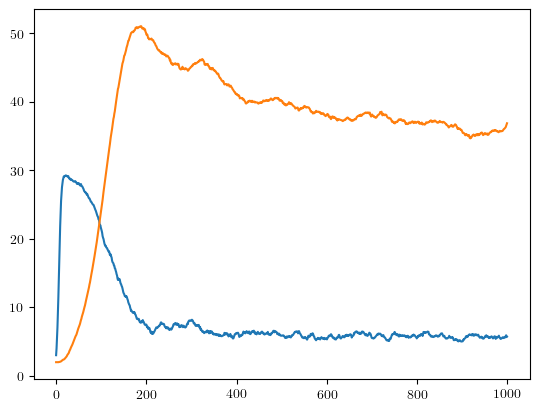

In [13]:
fig, ax = plt.subplots()

plt.plot(np.mean(combined_food, axis = 0))
plt.plot(np.mean(combined_pop, axis = 0))

plt.show()

In [20]:
mean_velocity = np.mean(np.array(combined_velocity), axis = 0)
mean_sight = np.mean(np.array(combined_sight), axis = 0)
mean_alpha = np.mean(np.array(combined_alpha), axis = 0)

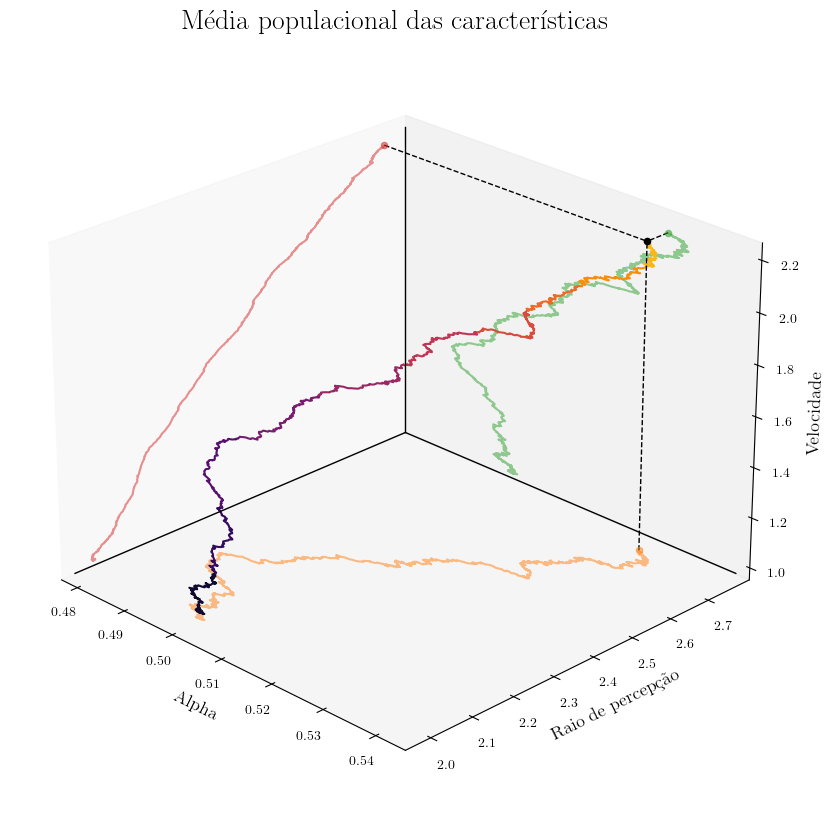

In [46]:
zenith = 25
theta = 315
idx = 1000
division_size = 100
attenzione = 0
pickpocket = 0

xmin, xmax = 0.98*min(mean_alpha), 1.02*max(mean_alpha)
ymin, ymax = 0.98*min(mean_sight), 1.02*max(mean_sight)
zmin, zmax = 0.98*min(mean_velocity), 1.02*max(mean_velocity)
labelsize = 13

ax = plt.figure(figsize=(8,8)).add_subplot(projection='3d')

ax.grid(False)

for i in range(idx//division_size):
    ax.plot(mean_alpha[division_size*i:division_size*(i+1)],
            mean_sight[division_size*i:division_size*(i+1)],
            mean_velocity[division_size*i:division_size*(i+1)],
            lw=1.5,
           color = sns.color_palette('inferno', idx//division_size + 1)[i])
    
ax.scatter(mean_alpha[idx-1], mean_sight[idx-1], mean_velocity[idx-1], color = 'black')

# imshow3d(ax, data[0], value_direction='x', cmap='magma')

ax.set_zlim(zmin, zmax)
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)

# ax.set_xticks([0.46,0.50,0.54,0.58,0.62])
ax.set_xlabel("Alpha", fontsize = labelsize)
# ax.set_yticks([1.7,1.9,2.1,2.3])
ax.set_ylabel("Raio de percepção", fontsize = labelsize)
# ax.set_zticks([0.6,1,1.4,1.8])
ax.set_zlabel("Velocidade", fontsize = labelsize)

    
ax.plot([mean_alpha[idx-1], mean_alpha[idx-1]], [mean_sight[idx-1],mean_sight[idx-1]], [zmin, mean_velocity[idx-1]],
       color = 'black', lw = 1, ls = '--')
ax.plot([mean_alpha[idx-1], mean_alpha[idx-1]], [ymax,mean_sight[idx-1]], [mean_velocity[idx-1], mean_velocity[idx-1]],
       color = 'black', lw = 1, ls = '--')
ax.plot([xmin, mean_alpha[idx-1]], [mean_sight[idx-1],mean_sight[idx-1]], [mean_velocity[idx-1], mean_velocity[idx-1]],
       color = 'black', lw = 1, ls = '--')

ax.plot(mean_alpha[:idx], mean_sight[:idx], zs=zmin, zdir='z', zorder = 0, alpha = 0.5, color = 'C1') # xy plane
ax.plot(mean_alpha[attenzione:pickpocket], mean_sight[attenzione:pickpocket], zs=zmin, zdir='z', zorder = 0, alpha = 0.8, color = 'black') # xy plane
ax.scatter(mean_alpha[idx-1], mean_sight[idx-1], zs=zmin, zdir='z', zorder = 0, alpha = 0.5, color = 'C1') # xy plane
ax.plot(mean_alpha[:idx], mean_velocity[:idx], zs=ymax, zdir='y', zorder = 0, alpha = 0.5, color = 'C2') # xz plane
ax.plot(mean_alpha[attenzione:pickpocket], mean_velocity[attenzione:pickpocket], zs=ymax, zdir='y', zorder = 0, alpha = 0.8, color = 'black') # xz plane
ax.scatter(mean_alpha[idx-1], mean_velocity[idx-1], zs=ymax, zdir='y', zorder = 0, alpha = 0.5, color = 'C2') # xz plane
ax.plot(mean_sight[:idx], mean_velocity[:idx], zs=xmin, zdir='x', zorder = 0, alpha = 0.5, color = 'C3') # yz plane
ax.plot(mean_sight[attenzione:pickpocket], mean_velocity[attenzione:pickpocket], zs=xmin, zdir='x', zorder = 0, alpha = 0.8, color = 'black') # yz plane
ax.scatter(mean_sight[idx-1], mean_velocity[idx-1], zs=xmin, zdir='x', zorder = 0, alpha = 0.5, color = 'C3') # yz plane

ax.plot([xmin,xmin], [ymax,ymax], [zmin, zmax], lw = 1, color = 'black') # z axis
ax.plot([xmin,xmin], [ymin,ymax], [zmin, zmin], lw = 1, color = 'black') # y axis
ax.plot([xmin,xmax], [ymax,ymax], [zmin, zmin], lw = 1, color = 'black') # x axis

plt.tight_layout()

ax.set_title("Média populacional das características", fontsize = 20, pad = 8)
ax.view_init(zenith, theta)
# plt.savefig(f"Plots/Mean_trajectory_characteristicis_I{attenzione}-F{pickpocket}_dispersalLOW.png", dpi = 90, bbox_inches = 'tight')
plt.show()

In [233]:
binsxy = [[0.2*i for i in range(26)],
        [0.2*i for i in range(26)]]
binsxz = [[0.2*i for i in range(26)],
        [0.2*i for i in range(26)]]

valuesXY, binsXY = np.histogramdd((velocity_distribution[nsteps-1], sight_distribution[nsteps-1]), bins = binsxy)
valuesXZ, binsXZ = np.histogramdd((alpha_distribution[nsteps-1], sight_distribution[nsteps-1]), bins = binsxz)
valuesYZ, binsYZ = np.histogramdd((alpha_distribution[nsteps-1], velocity_distribution[nsteps-1]), bins = binsxz)

In [234]:
np.array(binsXZ)

array([[0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ],
       [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]])

In [235]:
bins_centerXY = (np.array(binsXY)[:,1:] + np.array(binsXY)[:,:-1])/2
bins_centerXZ = (np.array(binsXZ)[:,1:] + np.array(binsXZ)[:,:-1])/2
bins_centerYZ = (np.array(binsYZ)[:,1:] + np.array(binsYZ)[:,:-1])/2

In [236]:
Xxy, Yxy = np.meshgrid(*bins_centerXY)
Xxz, Yxz = np.meshgrid(*bins_centerXZ)
Xyz, Yyz = np.meshgrid(*bins_centerYZ)

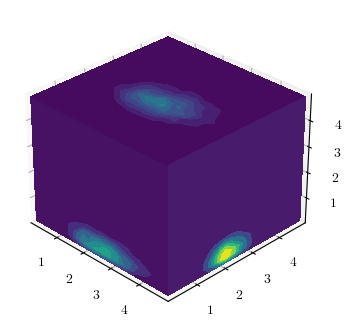

In [244]:
# Create a figure with 3D ax
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

# Plot contour surfaces
_ = ax.contourf(
    Xxy, Yxy, valuesXY,
    zdir='z', offset=np.max(Yxy),
    vmax = np.max([np.max(valuesYZ),np.max(valuesXY),np.max(valuesXZ)])
)
_ = ax.contourf(
    Xxz, valuesXZ, Yxz,
    zdir='y', offset=np.min(Xxz),
    vmax = np.max([np.max(valuesYZ),np.max(valuesXY),np.max(valuesXZ)])
)
C = ax.contourf(
    valuesYZ, Xyz, Yyz,
    zdir='x', offset=np.max(Yxz),
    vmax = np.max([np.max(valuesYZ),np.max(valuesXY),np.max(valuesXZ)])
)

ax.set_zlim(np.min(Yxy), np.max(Yxy))
ax.set_xlim(np.min(Xxz), np.max(Xxz))
ax.set_ylim(np.min(Yxz), np.max(Yxz))

ax.view_init(30, 315)
plt.show()

# Variation of some spatial feature

In [37]:
L = 100
v = 1
angle = 0
Ni = 2
size = 0.5

N0 = 4
K = 50
eps = 0.5
r = 0.02
dt = 0.5
food_energy = 500

sight_radius = 4
alpha = 1
max_energy = 10000
nsteps = 10000
plot_frequency = 1e9
mutatables = ['velocity', 'sight_radius', 'alpha']
# mutatables = [None]

fig_rows = 1
fig_columns = 2
figsize = (8,4)

In [43]:
multiple_pops = np.zeros((20,nsteps))
multiple_sights = np.zeros((20,nsteps))
multiple_velocities = np.zeros((20,nsteps))
multiple_alphas = np.zeros((20,nsteps))

for k in range(20):
    dispersal = 5*(i+1)
    combined_food = []
    combined_pop = []
    combined_velocity = []
    velocity_distribution = {}
    combined_sight = []
    sight_distribution = {}
    combined_alpha = []
    alpha_distribution = {}
    extinction = 0

    for i in range(nsteps):
        velocity_distribution[i] = np.array([])
        sight_distribution[i] = np.array([])
        alpha_distribution[i] = np.array([])

    for i in tqdm(range(100)):
        positions, velocities, energy, life, size_vec, sight_vec, food_pos, alphas = run_model(
            Ni,
            N0,
            L,
            v,
            food_energy,
            angle,
            size,
            K,
            r,
            dt,
            sight_radius,
            alpha,
            max_energy,
            dispersal,
            nsteps,
            plot_frequency,
            fig_rows = fig_rows,
            fig_columns = fig_columns,
            figsize = figsize,
            mutatables = mutatables,
            print_memory = True
        )
        if len(food_pos.keys()) != nsteps:
            extinction += 1
        else:
            food_population = []

            for j in range(nsteps):
                food_population.append(len(food_pos[j]))

            population = []
            velocity = []
            sight = []
            alpha_vec = []

            for j in range(nsteps):
                alive = np.where(life[j] == 1)[0]
                population.append(len(alive))
                velocity.append(np.mean(velocities[j][alive]))
                velocity_distribution[j] = np.concatenate((velocity_distribution[j], velocities[j][alive]))
                sight.append(np.mean(sight_vec[j][alive]))
                sight_distribution[j] = np.concatenate((sight_distribution[j], sight_vec[j][alive]))
                alpha_vec.append(np.mean(alphas[j][alive]))
                alpha_distribution[j] = np.concatenate((alpha_distribution[j], alphas[j][alive]))

            combined_food.append(food_population)
            combined_pop.append(population)
            combined_velocity.append(velocity)
            combined_sight.append(sight)
            combined_alpha.append(alpha_vec)
            
    multiple_pops[k] = np.mean(combined_pop, axis = 0)
    multiple_velocities[k] = np.mean(np.array(combined_velocity), axis = 0)
    multiple_sights[k] = np.mean(np.array(combined_sight), axis = 0)
    multiple_alphas[k] = np.mean(np.array(combined_alpha), axis = 0)

  0%|          | 0/100 [00:00<?, ?it/s]

Everybody diedMemory RAM usage: 11.83


  1%|          | 1/100 [02:32<4:11:08, 152.21s/it]

  2%|▏         | 2/100 [02:45<1:55:35, 70.77s/it] 

Everybody diedemory RAM usage: 11.84


  3%|▎         | 3/100 [23:36<16:24:58, 609.26s/it]

  4%|▍         | 4/100 [26:59<11:58:32, 449.09s/it]

Everybody diedMemory RAM usage: 11.62


  5%|▌         | 5/100 [47:20<19:11:58, 727.57s/it]

  6%|▌         | 6/100 [1:07:35<23:19:16, 893.15s/it]

  7%|▋         | 7/100 [1:27:48<25:46:32, 997.77s/it]

  8%|▊         | 8/100 [1:47:55<27:12:12, 1064.48s/it]

  9%|▉         | 9/100 [2:08:14<28:07:30, 1112.64s/it]

 10%|█         | 10/100 [2:09:07<19:38:22, 785.58s/it]

Everybody diedMemory RAM usage: 11.66


 12%|█▏        | 12/100 [2:31:16<16:30:55, 675.64s/it]

Everybody died


 13%|█▎        | 13/100 [2:31:28<11:27:57, 474.46s/it]

Everybody died


 16%|█▌        | 16/100 [3:11:42<14:00:12, 600.15s/it]

Everybody died


 19%|█▉        | 19/100 [3:52:12<14:30:08, 644.55s/it]

Everybody died


 20%|██        | 20/100 [3:53:24<10:30:06, 472.58s/it]

Everybody died


 21%|██        | 21/100 [3:53:42<7:22:38, 336.18s/it] 

Everybody died


 22%|██▏       | 22/100 [3:53:51<5:09:27, 238.05s/it]

Everybody died


 25%|██▌       | 25/100 [4:33:51<10:42:45, 514.21s/it]

Everybody died


 26%|██▌       | 26/100 [4:36:25<8:20:54, 406.14s/it] 

Everybody died


 27%|██▋       | 27/100 [4:44:40<8:46:22, 432.64s/it]

Everybody died


 28%|██▊       | 28/100 [4:44:52<6:07:52, 306.56s/it]

Everybody died


 31%|███       | 31/100 [5:31:06<12:31:22, 653.37s/it]

Everybody died


 32%|███▏      | 32/100 [5:32:00<8:56:34, 473.44s/it] 

Everybody died


 34%|███▍      | 34/100 [5:51:59<8:53:46, 485.26s/it] 

Everybody died


 37%|███▋      | 37/100 [6:42:44<13:53:13, 793.54s/it]

Everybody died


 46%|████▌     | 46/100 [9:20:50<12:20:39, 822.95s/it] 

Everybody died


 49%|████▉     | 49/100 [10:03:50<10:54:27, 769.95s/it] 

Everybody died


 53%|█████▎    | 53/100 [11:04:17<9:49:36, 752.70s/it]  

Everybody died


 54%|█████▍    | 54/100 [11:05:57<7:07:04, 557.04s/it]

Everybody died


 56%|█████▌    | 56/100 [11:25:47<6:24:19, 524.09s/it]

Everybody died


 59%|█████▉    | 59/100 [12:05:13<6:52:39, 603.88s/it] 

Everybody died


 60%|██████    | 60/100 [12:05:34<4:46:00, 429.02s/it]

Everybody died


 61%|██████    | 61/100 [12:13:56<4:53:02, 450.83s/it]

Everybody died


 65%|██████▌   | 65/100 [13:19:00<7:23:30, 760.31s/it]

Everybody died


 67%|██████▋   | 67/100 [13:38:58<5:43:55, 625.33s/it]

Everybody died


 68%|██████▊   | 68/100 [13:42:35<4:28:11, 502.87s/it]

Everybody died


 70%|███████   | 70/100 [14:02:50<4:12:14, 504.48s/it]

Everybody died


 76%|███████▌  | 76/100 [15:42:03<5:01:20, 753.34s/it] 

Everybody died


 77%|███████▋  | 77/100 [15:47:52<4:02:19, 632.16s/it]

Everybody died


 80%|████████  | 80/100 [16:27:37<3:34:48, 644.44s/it]

Everybody died


 81%|████████  | 81/100 [16:29:07<2:31:23, 478.05s/it]

Everybody died


 82%|████████▏ | 82/100 [16:31:55<1:55:31, 385.06s/it]

Everybody died


 84%|████████▍ | 84/100 [16:52:08<1:58:46, 445.40s/it]

Everybody died


 86%|████████▌ | 86/100 [17:12:37<1:51:50, 479.30s/it]

Everybody died


 87%|████████▋ | 87/100 [17:17:21<1:31:08, 420.66s/it]

Everybody died


 88%|████████▊ | 88/100 [17:26:12<1:30:45, 453.82s/it]

Everybody died


 89%|████████▉ | 89/100 [17:26:21<58:44, 320.37s/it]  

Everybody died


 90%|█████████ | 90/100 [17:28:22<43:26, 260.65s/it]

Everybody died


 91%|█████████ | 91/100 [17:28:31<27:46, 185.14s/it]

Everybody died


 92%|█████████▏| 92/100 [17:29:27<19:31, 146.39s/it]

Everybody died


 94%|█████████▍| 94/100 [17:49:38<32:45, 327.66s/it]

Everybody died


 95%|█████████▌| 95/100 [18:12:53<53:59, 647.85s/it]

 96%|█████████▌| 96/100 [18:13:12<30:36, 459.23s/it]

Everybody diedMemory RAM usage: 11.67


 97%|█████████▋| 97/100 [18:38:03<38:26, 768.78s/it]

 98%|█████████▊| 98/100 [19:01:27<31:58, 959.44s/it]

 99%|█████████▉| 99/100 [19:02:16<11:26, 686.14s/it]

Everybody diedMemory RAM usage: 11.78


  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [25:29<42:03:54, 1529.64s/it]

Everybody diedMemory RAM usage: 12.46


  2%|▏         | 2/100 [30:10<21:38:14, 794.84s/it] 

  3%|▎         | 3/100 [54:08<29:19:57, 1088.63s/it]

  4%|▍         | 4/100 [1:18:07<32:43:00, 1226.88s/it]

  5%|▌         | 5/100 [1:43:59<35:28:26, 1344.28s/it]

Exception ignored in: <generator object tqdm.__iter__ at 0x7f624afdd450>
KeyboardInterrupt: 
  5%|▌         | 5/100 [1:54:14<36:10:41, 1370.96s/it]


KeyboardInterrupt: 